# **Data Analysis of Electric Vehicles and Impact on Enviroment**
Name: Goh Pin Pin Isaac<br>
Admin Number : P2317623<br>
Class: DAAA/FT/1B/07<br>
Module Code: ST1510 Programming for Data Analytics
<br><br>
<hr>

## **Background Info**
With the current state of **Global Warming**, Singapore has chosen to participate in (UN in Action) to fulfil the 17 UNSDGs. And Singapore created a plan called **GreenPlan** to strengthening Singapore's commitments to the 17 UNSDGs<br>
One of Singapore's GreenPlan target is to reduce domestic greenhouse gas emissions by at least 3 million tonnes per year by 2030 <br>
- **SDG 7 (Affordable and Clean Energy)** 
- **SDG 13 (Climate Action)**


Mr Lee is in Ministry of Transport and is given the task of fulfilling GreenPlan 2030. <br>
He gave an idea of citizens driving Electric Vehicles. <br>
However, his colleges mocks him saying they actually will emit more gases and are better just driving on gas.<br>

Source: https://ypte.org.uk/factsheets/electric-cars/what-are-the-downsides-to-electric-cars
<br><br>
<hr>

## **Mr Lee's Mission**
- Find out if Electric Vehicles are better for the environment or not emitting greenhouse gases
- Pitch a solution after the research so GreenPlan’s target can be fulfulled
<br><br>
<hr>

## **List of Sources:**
- Datasets
    - Air Pollutant CarbonMonoxide: https://beta.data.gov.sg/collections/1365/view
    - Air Pollutant NitrogrenDioxide: https://beta.data.gov.sg/collections/1366/view
    - Stats of Electric Vehicles: https://github.com/OSkrk/Electric-vehicles-EV-Database/blob/main/Data/EVs_data_base.csv
    - Europe monitoring of CO2: https://co2cars.apps.eea.europa.eu/?source=%7B"track_total_hits"%3Atrue%2C"query"%3A%7B"bool"%3A%7B"must"%3A%5B%7B"constant_score"%3A%7B"filter"%3A%7B"bool"%3A%7B"must"%3A%5B%7B"bool"%3A%7B"should"%3A%5B%7B"term"%3A%7B"year"%3A-1%7D%7D%5D%7D%7D%2C%7B"bool"%3A%7B"should"%3A%5B%7B"term"%3A%7B"scStatus"%3A"Provisional"%7D%7D%5D%7D%7D%5D%7D%7D%7D%7D%5D%7D%7D%2C"display_type"%3A"tabular"%7D
- Formulas for Features
    - Energy Consumption: https://evdb.nz/wltp
    - Specific power: https://en.wikipedia.org/wiki/Power-to-weight_ratio
- Others
    - WLTP vs NEDC: https://www.rivervaleleasing.co.uk/guides/leasing-overview/difference-between-wltp-and-nedc-emissions-tests-explained
    


# Importing Libraries and Datasets

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

co = pd.read_csv('./datasets/AirPollutantCarbonMonoxide2ndMaximum8HourMean.csv')
no2 = pd.read_csv('./datasets/AirPollutantNitrogenDioxide.csv')
ev = pd.read_csv('./datasets/EVs_data_base.csv')
europe = pd.read_csv('./datasets/europe.csv')

# Dataset Breakdown - **Dataset 1** (Europe Monitoring of CO2 emmissions)

The Dataset is very big with a lot of null and unwanted columns
<br><br>
<hr>

### **Features Focusing On**
- Manufacturer name
- Mass in running order (kg) / Mass of Vehicle
- Specific CO2 Emissions in g/km (NEDC)
- Fuel type
- Engine power in (KW)
- year
<br><br>
<hr>

### New Features
- **Vehicle_Type**
    - <1400         *(Micro)*
    - 1400< x <1700 *(Sedan)*
    - 1700< x <2100 *(hatchback)*
    - 2100< x <2500 *(SUV)*
    - 2500>         *(Van)*
- **Specific_Power**
    - It is used as a measurement of performance of a vehicle as a whole, with the engine's power output being divided by the weight (or mass) of the vehicle
Formula:
\begin{equation}
PowerToWeightRatio = \frac{PowerOfVehicle(W)}{MassOfVehicle(kg)}
\end{equation}

In [3]:
# ========== Importing Dataset ==========
europe = pd.read_csv('./datasets/europe.csv')

# ========== Dropping unwanted features ==========
europe.drop(['ID','Country','VFN','Mh','Man','MMS','Tan','T','Va','Ve','Mk',
             'Cn','Ct','Cr','r','Mt','Fm','z (Wh/km)','IT','De','Vf','Status',
             'Ernedc (g/km)','Erwltp (g/km)','Date of registration',
             'Fuel consumption ','Electric range (km)','W (mm)','At1 (mm)',
             'At2 (mm)', 'ec (cm3)'], axis='columns',inplace=True)

# ========== Standardizing Fuel Type (Cleaning Data) ==========
europe['Ft'] = europe['Ft'].str.upper()
europe['Ft'] = europe['Ft'].replace(to_replace = "PETROL-ELECTRIC", value = "PETROL/ELECTRIC")

# ========== Standardizing Vehicle Type ==========
def Vehicle_Bining(x):
    if x<1400:
        return 'Micro'
    elif x>=1400 and x<1700:
        return 'Sedan'
    elif x>=1700 and x<2100:
        return 'hatchback'
    elif x>=2100 and x<2500:
        return 'SUV'
    else:
        return 'Van'
    
europe['Vehicle_Type'] = list(map(Vehicle_Bining,europe['m (kg)']))

# ========== New feature (Specific Power) - PowerOfVehicle(W)/MassOfVehicle(kg) ==========
europe['Specific_Power'] = round((europe['ep (KW)']*1000)/europe['m (kg)'],2)

# ========== Reseting index ==========
europe.reset_index(inplace=True,drop=True)

In [4]:
print(europe.info(),end='\n\n')
print('Number of unique values in each feature')
for col in europe:
    print(f'\t- {len(europe[col].unique())} \tunique values in {col}')
europe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80279 entries, 0 to 80278
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mp              66564 non-null  object 
 1   m (kg)          80262 non-null  float64
 2   Enedc (g/km)    66870 non-null  float64
 3   Ewltp (g/km)    28882 non-null  float64
 4   Ft              80199 non-null  object 
 5   ep (KW)         56350 non-null  float64
 6   year            80279 non-null  int64  
 7   Vehicle_Type    80279 non-null  object 
 8   Specific_Power  56335 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 5.5+ MB
None

Number of unique values in each feature
	- 42 	unique values in Mp
	- 1211 	unique values in m (kg)
	- 290 	unique values in Enedc (g/km)
	- 280 	unique values in Ewltp (g/km)
	- 6 	unique values in Ft
	- 186 	unique values in ep (KW)
	- 13 	unique values in year
	- 5 	unique values in Vehicle_Type
	- 2206 	unique values in Spe

,m (kg),Enedc (g/km),Ewltp (g/km),ep (KW),year,Specific_Power
count,80262.000000,66870.000000,28882.000000,56350.000000,80279.000000,56335.000000
mean,1453.876517,125.886930,143.485874,123.301970,2018.507841,84.615989
std,287.655815,28.397111,36.757800,55.093234,2.843508,35.920513
min,685.000000,0.000000,0.000000,2.000000,2010.000000,1.550000
25%,1260.000000,111.000000,129.000000,85.000000,2017.000000,62.310000
50%,1412.000000,124.000000,141.000000,110.000000,2019.000000,71.200000
75%,1605.000000,136.000000,152.000000,147.000000,2021.000000,87.340000
max,3835.000000,495.000000,373.000000,585.000000,2022.000000,333.330000


# Dataset 2 (Statistics on Electric Vehicles)
This Dataset is not that big, However, there are unused features.
<hr>

### Features Focusing On
- Autonomy WLTP Km (range)
- year
- Car_type
- Battery Capacity (kWh)

### New Features
- **Energy Consumption**
    - Electric energy stored in the battery and how efficient it is being converted
Formula:
\begin{equation}
Energy Consumption(Wh/km) = \frac{Usable Battery(Wh)}{Range(km)}
\end{equation}

In [5]:
# ========== Importing Dataset ==========
ev = pd.read_csv('./datasets/EVs_data_base.csv')

# ========== Dropping unwanted features ==========
ev.drop(['Car model','DC Charging connector','DC charging protocol',
         'DC_nominal_charge_power_KW','AC Charging connector',
         'AC_nominal_charging','AC Charging Protocol',
         'Approx_Release_price_order_in_K$','Source'
        ], axis='columns',inplace=True)

# ========== Standardizing Car Type (Cleaning Data) ==========
ev['Car_type'] = ev['Car_type'].str.upper()
ev = ev[~ev['Car_type'].str.contains('EMPTY')]
ev['Car_type'] = ev['Car_type'].replace(to_replace = "HATCHBACK_", value = "HATCHBACK")

# ========== Standardizing Battery_Capacity_kWh (Cleaning Data) ==========
ev = ev[~ev['Battery_Capacity_kWh'].str.contains('empty')]

# ========== New feature (Energy Consumption) ((UsableBattery (KWh)*1000) / Range(km)) ==========
ev['Energy_Consumption'] = round((ev['Battery_Capacity_kWh'].astype(float))*1000/ev['Autonomy_WLTP_Km'].astype(float),2)

# ========== Making dropping unused data ==========
ev.reset_index(inplace=True,drop=True)

In [6]:
print(ev.info(),end='\n\n')
print('Number of unique values in each feature')
for col in ev:
    print(f'\t- {len(ev[col].unique())} \tunique values in {col}')
ev.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Autonomy_WLTP_Km      31 non-null     object 
 1   year                  31 non-null     int64  
 2   Car_type              31 non-null     object 
 3   Battery_Capacity_kWh  31 non-null     object 
 4   Energy_Consumption    31 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB
None

Number of unique values in each feature
	- 19 	unique values in Autonomy_WLTP_Km
	- 11 	unique values in year
	- 5 	unique values in Car_type
	- 22 	unique values in Battery_Capacity_kWh
	- 25 	unique values in Energy_Consumption


,year,Energy_Consumption
count,31.000000,31.000000
mean,2016.935484,184.876129
std,3.453843,55.942392
min,2010.000000,78.950000
25%,2015.500000,141.165000
50%,2018.000000,180.000000
75%,2020.000000,222.220000
max,2022.000000,300.000000


# Data breakdown - Dataset 3 (Air Pollutant Carbon Monoxide)
This Dataset is quite small but it gives us the overall Carbon Monoxide emissions of Singapore
<hr>

### Features Focusing On
- co_max_8hour_mean (µg/m3)
- year

In [7]:
# ========== Importing Dataset ==========
co = pd.read_csv('./datasets/AirPollutantCarbonMonoxide2ndMaximum8HourMean.csv')

# ========== Multiplying it so its the full 24hrs ==========
co['co_max_24hour_mean'] = list(map(lambda x: x*3, co['co_max_8hour_mean']))

In [8]:
print(co.info(),end='\n\n')
print('Number of unique values in each feature')
for col in co:
    print(f'\t- {len(co[col].unique())} \tunique values in {col}')
co.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                22 non-null     int64  
 1   co_max_8hour_mean   22 non-null     float64
 2   co_max_24hour_mean  22 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 660.0 bytes
None

Number of unique values in each feature
	- 22 	unique values in year
	- 16 	unique values in co_max_8hour_mean
	- 16 	unique values in co_max_24hour_mean


,year,co_max_8hour_mean,co_max_24hour_mean
count,22.000000,22.000000,22.000000
mean,2010.500000,2.440909,7.322727
std,6.493587,1.034021,3.102063
min,2000.000000,1.200000,3.600000
25%,2005.250000,1.725000,5.175000
50%,2010.500000,2.100000,6.300000
75%,2015.750000,2.775000,8.325000
max,2021.000000,5.500000,16.500000


# Data breakdown - Dataset 4 (Air Pollutant Nitrogen Dioxide)
This Dataset is quite small but it gives us the overall Nitrogen Dioxide emissions of Singapore
<hr>

### Features Focusing On
- nitrogen_dioxide_mean (µg/m3)
- year

In [9]:
# ========== Importing Dataset ==========
no2 = pd.read_csv('./datasets/AirPollutantNitrogenDioxide.csv')

# ========== Removing 2022 ==========
no2 = no2[no2['year']!=2022]

In [10]:
print(no2.info(),end='\n\n')
print('Number of unique values in each feature')
for col in no2:
    print(f'\t- {len(no2[col].unique())} \tunique values in {col}')
no2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   year                   22 non-null     int64
 1   nitrogen_dioxide_mean  22 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes
None

Number of unique values in each feature
	- 22 	unique values in year
	- 8 	unique values in nitrogen_dioxide_mean


,year,nitrogen_dioxide_mean
count,22.000000,22.000000
mean,2010.500000,24.409091
std,6.493587,2.152719
min,2000.000000,20.000000
25%,2005.250000,23.000000
50%,2010.500000,25.000000
75%,2015.750000,25.750000
max,2021.000000,30.000000


In [18]:
plt.style.use('seaborn-v0_8-darkgrid')

# Graph 1 **(Line graph)** - The total air pollutant emissions of CO and NO2 in SG 

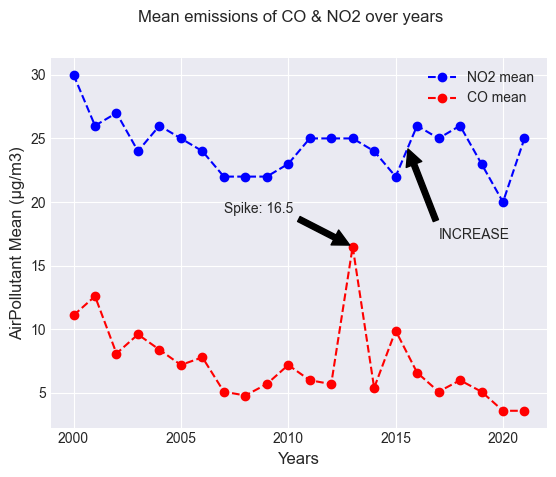

In [19]:
# ========== Range of years used ========== 
years = [i for i in range(2000,2022)]

# ========== Plotting values ========== 
plt.plot(years,no2['nitrogen_dioxide_mean'] ,'b--',marker='o',label='NO2 mean')  # Plot NO2
plt.plot(years,co['co_max_24hour_mean'], 'r--',marker='o',label='CO mean')       # Plot CO

# ========== Title | Label | Legend ========== 
plt.suptitle('Mean emissions of CO & NO2 over years')
plt.xlabel('Years',fontsize=12)
plt.ylabel('AirPollutant Mean (µg/m3)',fontsize=12)
plt.legend(loc='best')


# ========== Highlight (ARROW) ========== 
plt.annotate('Spike: 16.5', xy=(2013,16.5), xycoords='data',
            xytext=(2007,20),
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('INCREASE', xy=(2015.5,24.5), xycoords='data',
            xytext=(2017,18),
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))

# ========== Plot graph ==========
plt.show()

# Graph 2 **(Line Graph)** - Growth of The Vehicles 

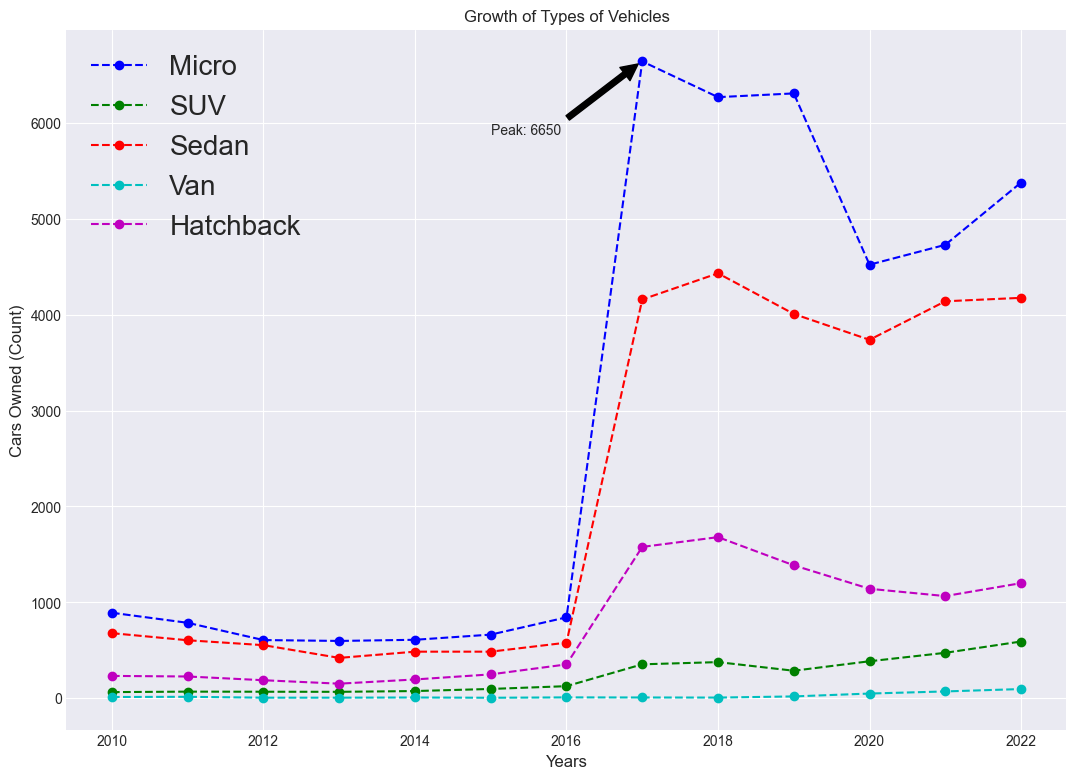

In [13]:
# ========== Values used from (EUROPE Dataset) ==========
data = pd.DataFrame(europe.groupby(["year", "Vehicle_Type"])["Vehicle_Type"].count())   # Count of Each Vehicle_Type
data = data.unstack().reset_index()         # Year & Vehicle Type are Indexes (Unstack & Reset Index) to put them into usuable columns

# ========== Figure Settings ==========
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

# ========== Plotting Each Type of Vehicle ==========
plt.plot(data.year, data.Vehicle_Type.Micro,'b--',marker='o',label='Micro')
plt.plot(data.year, data.Vehicle_Type.SUV,'g--',marker='o',label='SUV')
plt.plot(data.year, data.Vehicle_Type.Sedan,'r--',marker='o',label='Sedan')
plt.plot(data.year, data.Vehicle_Type.Van,'c--',marker='o',label='Van')
plt.plot(data.year, data.Vehicle_Type.hatchback,'m--',marker='o',label='Hatchback')

# ========== Highlight (ARROW) ==========
ax.annotate('Peak: 6650', xy=(2017,6650), xycoords='data',
            xytext=(2015,6000), textcoords='data',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))

# ========== Title | Label | Legend ========== 
plt.title('Growth of Types of Vehicles')
plt.legend(loc='best', fontsize="20")
plt.xlabel('Years',fontsize=12)
plt.ylabel('Cars Owned (Count)',fontsize=12)

# ========== Plot Graph ==========
plt.show()

# Graph 3 **(Boxplot)** - Type of Fuel to CO2 Emissions

Average years needed to cover for an electric battery is 3.42 years for PETROL
Average years needed to cover for an electric battery is 3.28 years for DIESEL
Average years needed to cover for an electric battery is 10.0 years for PETROL/ELECTRIC
Average years needed to cover for an electric battery is 9.64 years for DIESEL/ELECTRIC
ELECTRIC doesn't emit any CO2


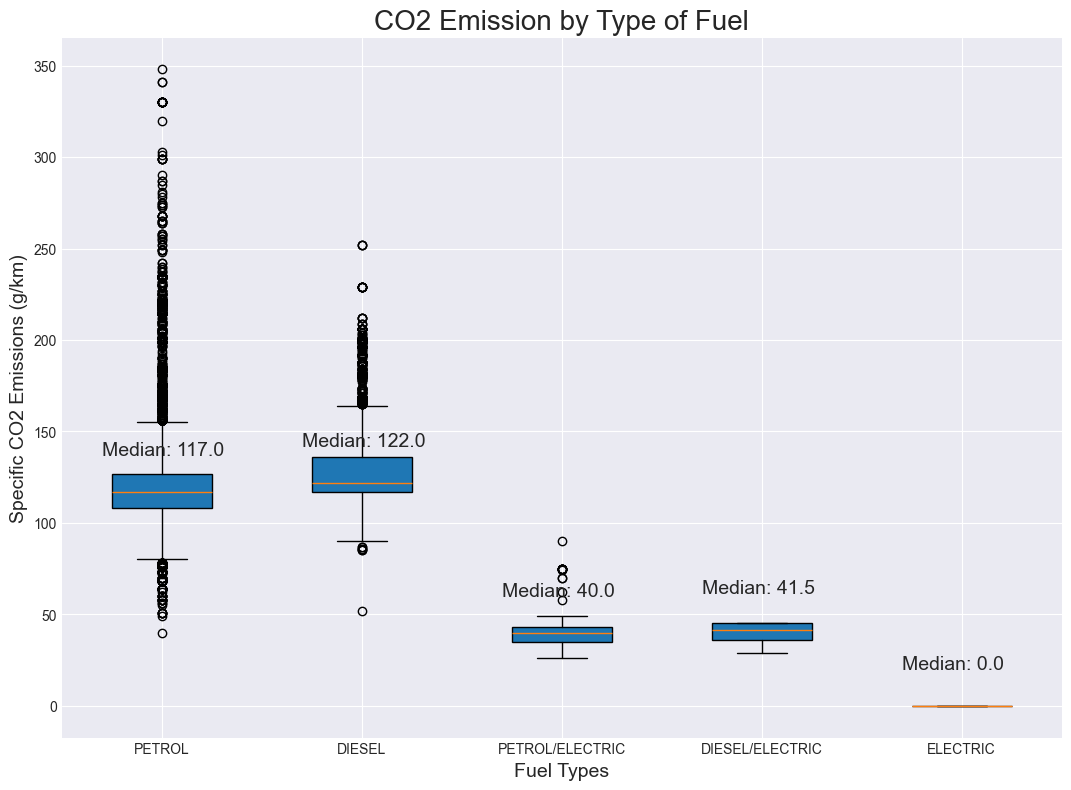

In [14]:
# ========== Creating DataFrames According to Each Fuel Type ==========
mask_petrol = europe.dropna().Ft.str.contains('PETROL$',regex=True)                     # Drop all NA and check the Fuel Type contains the specified type (MASKS)
mask_diesel = europe.dropna().Ft.str.contains('DIESEL$',regex=True)                     
mask_pe = europe.dropna().Ft.str.contains('PETROL/ELECTRIC$',regex=True)                     
mask_de = europe.dropna().Ft.str.contains('DIESEL/ELECTRIC$',regex=True)                     
mask_electric = europe.dropna().Ft.str.contains('^ELECTRIC',regex=True)    

# ========== Filtering DataFrames According to masks ==========
petrol = europe.dropna()[mask_petrol]             
diesel = europe.dropna()[mask_diesel]
pe = europe.dropna()[mask_pe]
de = europe.dropna()[mask_de]
electric = europe.dropna()[mask_electric]

# ========== CO2 Emission of Each Fuel Type (ARRAY) ==========
data = [petrol['Enedc (g/km)'],diesel['Enedc (g/km)'],pe['Enedc (g/km)'],de['Enedc (g/km)'],electric['Enedc (g/km)']]
labels = ['PETROL','DIESEL','PETROL/ELECTRIC', 'DIESEL/ELECTRIC', 'ELECTRIC']
# ========== Figure Settings ==========
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

# ========== Plotting Boxplot ==========
bp = ax.boxplot(data,labels=labels,patch_artist=True)

# ========== Title | Labels ==========
plt.title('CO2 Emission by Type of Fuel',fontsize=20)
plt.xlabel('Fuel Types',fontsize = 14)
plt.ylabel('Specific CO2 Emissions (g/km)',fontsize = 14)

# ========== Highlight (Median) ==========
for line,name in zip(bp['medians'],labels):
    # get position data for top of median line 
    x, y = line.get_xydata()[1]
    plt.text(x-0.55,y+20,f'Median: {y:.1f}',fontsize=14)

    # Calculation to meet a battery 
    if name == 'ELECTRIC':
        print(f'{name} doesn\'t emit any CO2')
    else:
        totalkm = 7000000/y
        avekm_year = 17500
        print(f'Average years needed to cover for an electric battery is {round(totalkm/avekm_year,2)} years for {name}')

# ========== Plot Graph ==========
plt.show()

# Graph 4 **(Scatter plot)** - Correlation between SpecificPower & CO2 Emission

Petrol is a MODERATE and POSITIVE correlation between Specific Power & Enedc (g/km)
r = 0.68742

Diesel is a MODERATE and POSITIVE correlation between Specific Power & Enedc (g/km)
r = 0.53214

Petrol/Electric is a WEAK and POSITIVE correlation between Specific Power & Enedc (g/km)
r = 0.11397

Diesel/Electric is a WEAK and POSITIVE correlation between Specific Power & Enedc (g/km)
r = 0.20249

Electric is a DIRECT correlation between Specific Power & Enedc (g/km)


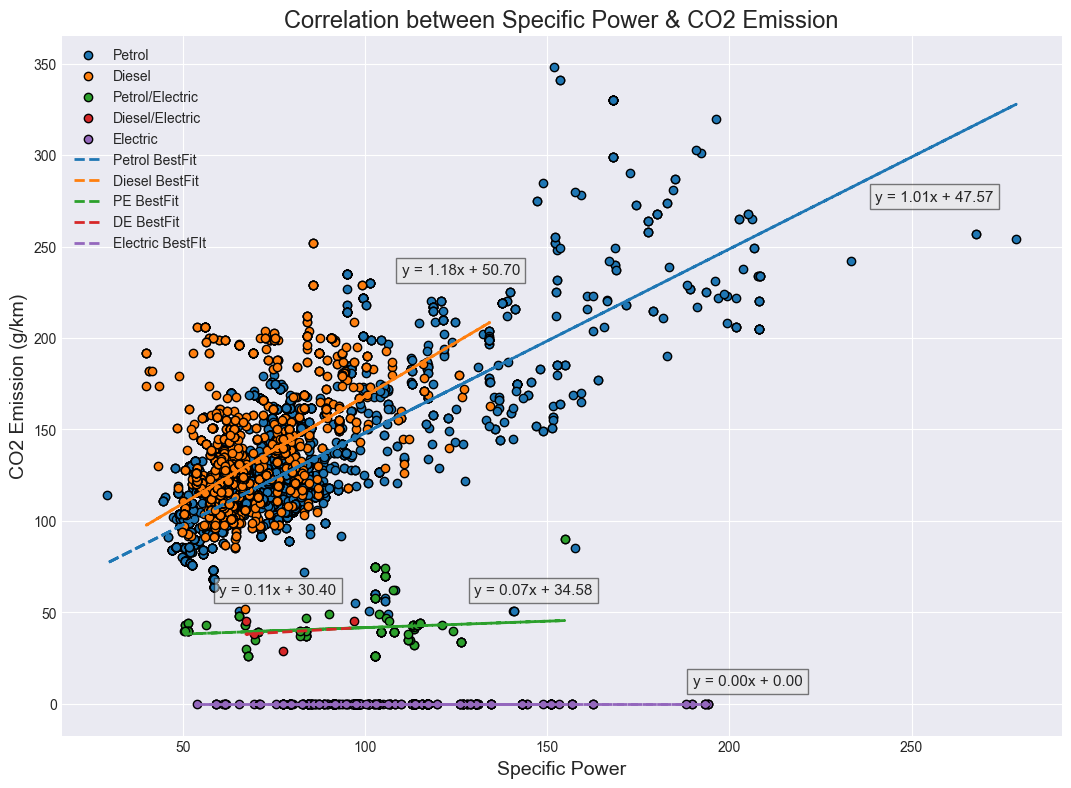

In [15]:
# ========== Creating DataFrames According to Each Fuel Type ==========
mask_petrol = europe.dropna().Ft.str.contains('PETROL$',regex=True)                     # Drop all NA and check the Fuel Type contains the specified type (MASKS)
mask_diesel = europe.dropna().Ft.str.contains('DIESEL$',regex=True)                     
mask_pe = europe.dropna().Ft.str.contains('PETROL/ELECTRIC$',regex=True)                     
mask_de = europe.dropna().Ft.str.contains('DIESEL/ELECTRIC$',regex=True)                     
mask_electric = europe.dropna().Ft.str.contains('^ELECTRIC',regex=True)  

# ========== Filtering DataFrames According to masks ==========
petrol = europe.dropna()[mask_petrol].dropna(subset=['Specific_Power','Enedc (g/km)'])             
diesel = europe.dropna()[mask_diesel].dropna(subset=['Specific_Power','Enedc (g/km)'])
pe = europe.dropna()[mask_pe].dropna(subset=['Specific_Power','Enedc (g/km)'])
de = europe.dropna()[mask_de].dropna(subset=['Specific_Power','Enedc (g/km)'])
electric = europe.dropna()[mask_electric].dropna(subset=['Specific_Power','Enedc (g/km)'])

# ========== Figure Settings ==========
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

# ========== Title | Labels ==========
plt.title("Correlation between Specific Power & CO2 Emission", fontsize=17)
ax.set_ylabel("CO2 Emission (g/km)", fontsize=14)
ax.set_xlabel("Specific Power", fontsize=14)

import math
# ========== Check Strength and Sign of r_coef ==========
def check(r):
    if (math.isnan(r)):
        return "Not a Digit"
    # ===== STRENGTH =====
    if abs(r)>0.8:
        strength = 'strong'
    elif (abs(r)>0.5):
        strength = 'moderate'
    else:
        strength = 'weak'

    # ===== SIGN =====
    if r<0:
        sign = 'negative'
    else:
        sign = 'positive'
    
    return sign,strength

# ===== Setting up the Individual data for each plot ===== 
data = [petrol,diesel,pe,de,electric]
types = ['Petrol','Diesel','Petrol/Electric','Diesel/Electric','Electric']
coords = [(240,275),(110,235),(130,60),(60,60),(190,10)]

# ===== Plotting Scatter plot =====
for fuel,name in zip(data,types):
    im = ax.scatter(fuel['Specific_Power'],fuel['Enedc (g/km)'],edgecolors='k')
    if name == "Electric":                                                                      # Electric has an Exception as it has no CO2 Emissions
        print(f"{name} is a DIRECT correlation between Specific Power & Enedc (g/km)")
    else:
        correlation_coefficient = np.corrcoef(fuel['Specific_Power'],fuel['Enedc (g/km)'])
        r_coef = correlation_coefficient[0,1]
        results = check(r_coef)
        print(f"{name} is a {results[1].upper()} and {results[0].upper()} correlation between Specific Power & Enedc (g/km)\nr = {r_coef:.5g}\n")

# ===== Plotting BestFit and Equation =====
for fuel,coord in zip(data,coords):
    a, b = np.polyfit(fuel['Specific_Power'], fuel['Enedc (g/km)'], 1)
    plt.plot(fuel['Specific_Power'], a*fuel['Specific_Power']+b, linestyle='--', linewidth=2)
    plt.text(coord[0], coord[1],
            f'y = {a:.2f}x + {b:.2f}',
            fontsize=11,
            bbox={'facecolor':'#E8E7E5', 'alpha':0.5, 'pad':4})


plt.legend(['Petrol','Diesel','Petrol/Electric','Diesel/Electric','Electric','Petrol BestFit','Diesel BestFit','PE BestFit','DE BestFit','Electric BestFIt'])
plt.show()

# Graph 5 **(Bar graph)** - Type of vehicle and How Efficient is their battery

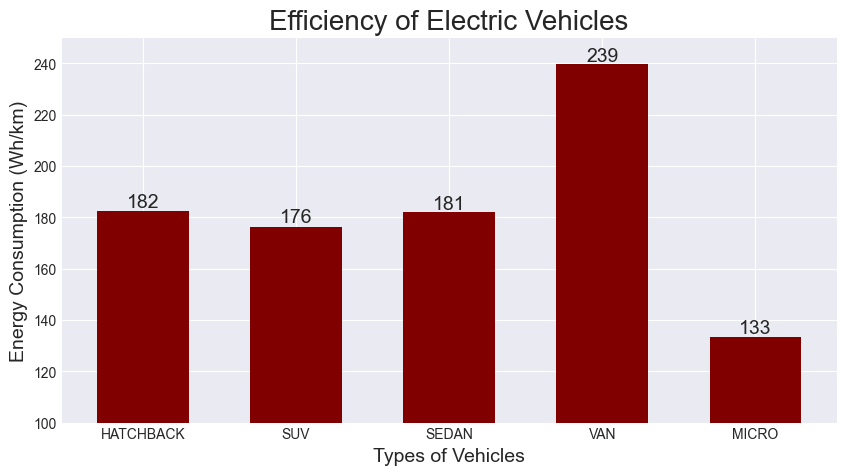

In [16]:
# ========== Create Dictionary of the Average Energy Consumption (Value) of Each Vehicle Type (Key) ==========
data = {
    'HATCHBACK': ev[ev['Car_type'].str.contains('HATCHBACK')]['Energy_Consumption'].mean(),
    'SUV': ev[ev['Car_type'].str.contains('SUV')]['Energy_Consumption'].mean(),
    'SEDAN': ev[ev['Car_type'].str.contains('SEDAN')]['Energy_Consumption'].mean(),
    'VAN': ev[ev['Car_type'].str.contains('VAN')]['Energy_Consumption'].mean(),
    'MICRO': ev[ev['Car_type'].str.contains('MICRO')]['Energy_Consumption'].mean()
}

# ========== Figure Settings ==========
fig, ax = plt.subplots(figsize=(10,5))
ax.set(ylim=[100, 250])                 # Y limit (Start at 100 and End at 250)

# ========== Creating Lables in the Center of Each Vehicle Tpe ==========
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(int(i), int(y[i])+2, int(y[i]), ha = 'center',fontsize=14)


# ========== Plotting the Bar Chart ==========
plt.bar(list(data.keys()), list(data.values()), color='maroon',width = 0.6)
addlabels(list(data.keys()), list(data.values()))

# ========== Title | Label ==========
plt.title("Efficiency of Electric Vehicles",fontsize = 20)
plt.ylabel("Energy Consumption (Wh/km)",fontsize = 14)
plt.xlabel("Types of Vehicles",fontsize = 14)

# ========== Plot Graph ==========
plt.show()

# Graph 6 **(Pie Chart)** - Distribution of Vehicles between Non-EV & EV

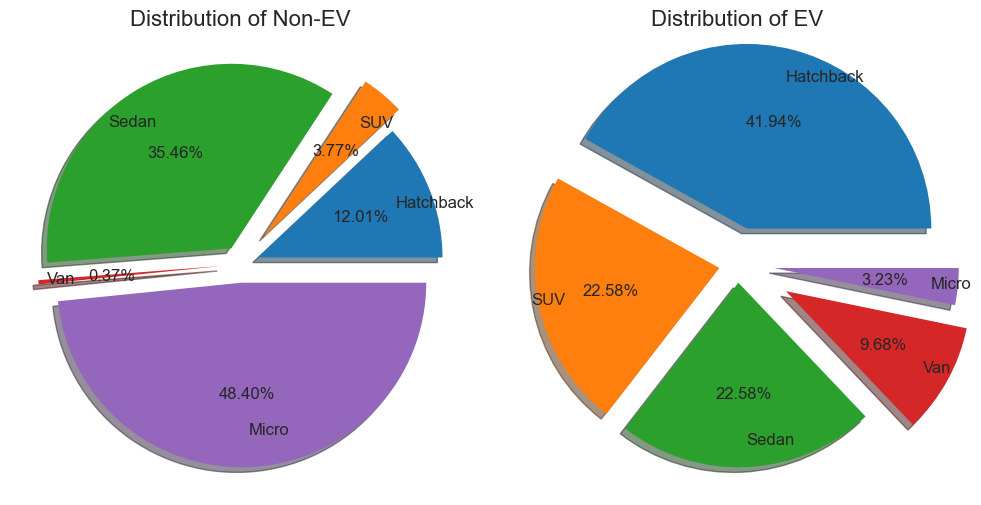

In [17]:
# ========== Non-Electric Vehicle (Dataset = 'europe') ==========
hatchback = europe['Vehicle_Type'].value_counts().hatchback/len(europe['Vehicle_Type'])     # Get the Percentage of Each Type of Vehicle in `europe` dataset
micro = europe['Vehicle_Type'].value_counts().Micro/len(europe['Vehicle_Type'])
sedan = europe['Vehicle_Type'].value_counts().Sedan/len(europe['Vehicle_Type'])
suv = europe['Vehicle_Type'].value_counts().SUV/len(europe['Vehicle_Type'])
van = europe['Vehicle_Type'].value_counts().Van/len(europe['Vehicle_Type'])     

# ========== Electric Vehicle (Dataset = 'ev') ==========
hatchback_ev = ev['Car_type'].value_counts().HATCHBACK/len(ev['Car_type'])                  # Get the Percentage of Each Type of Vehicle in `ev` dataset
suv_ev = ev['Car_type'].value_counts().SUV/len(ev['Car_type'])           
sedan_ev = ev['Car_type'].value_counts().SEDAN/len(ev['Car_type'])         
van_ev = ev['Car_type'].value_counts().VAN/len(ev['Car_type'])           
micro_ev = ev['Car_type'].value_counts().MICRO/len(ev['Car_type'])         

# ========== Figure Settings ==========
fig = plt.figure(1, figsize=(10, 7))
myexplode=[0.2,0.1,0.1,0.3,0.2]
wedgeprops = {'linewidth': 1}

# ========== 1st Pie (Non-EV) ==========
plt.subplot(1,2,1)
plt.title("Distribution of Non-EV", fontsize=16)
plt.pie([hatchback,suv,sedan,van,micro], labels=['Hatchback','SUV', 'Sedan', 'Van', 'Micro'], autopct ='%.2f%%' ,shadow=True ,explode=[0.1,0.2,0.1,0.1,0.1],
wedgeprops=wedgeprops,labeldistance=0.8,textprops={'fontsize': 12})

# ========== 2nd Pie (EV) ==========
plt.subplot(1,2,2)
plt.title("Distribution of EV", fontsize=16)
plt.pie([hatchback_ev,suv_ev, sedan_ev, van_ev, micro_ev], labels=['Hatchback','SUV', 'Sedan', 'Van', 'Micro'], autopct ='%.2f%%' ,shadow=True ,explode=[0.2,0.1,0.1,0.3,0.2],
wedgeprops=wedgeprops,labeldistance=0.85,textprops={'fontsize': 12})

# ========== Plot Graph ==========
plt.tight_layout()
plt.show()

# Conclusions 
After analysing all the data, this is what Mr Lee found out.
- The manifaturing of vehicles emits a lot of greenhouse gases.
- The Most efficient battery type is Micro
- The Stronger the Engines, the more CO2 it produces
- Normal Fuel-based vehicles produce 3 times than the manifacturing of a car battery in the 10 years

Singapore citizens should start driving electric vehicles as it doesn't emit any greenhouse gases. <br>
The only area where it will emit is when the production of the electric energy for charging is Non-renewable. <br>
However, if singaporeans invested and experimented with more electric vehicles with **Regenerative Braking** or **Solar Energy**, we would get a total clean vehicle